In [1]:
import keras
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

from IPython.display import display

from sklearn.preprocessing import LabelEncoder,  StandardScaler, OneHotEncoder

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow import keras
from tensorflow.keras import layers
# Setup plotting
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

import pandas as pd
(trainX, trainy), (testX, testy) = mnist.load_data()

In [2]:
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(units=64, activation='relu'),
    layers.BatchNormalization(),
    # the Categ output layer 
    layers.Dense(units=10),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [3]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
500/500 [==============================] - 20s 38ms/step - loss: 0.1270 - accuracy: 0.9656 - val_loss: 0.1144 - val_accuracy: 0.9678
Epoch 2/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0408 - accuracy: 0.9881 - val_loss: 0.0476 - val_accuracy: 0.9860
Epoch 3/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0283 - accuracy: 0.9916 - val_loss: 0.0352 - val_accuracy: 0.9890
Epoch 4/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0282 - val_accuracy: 0.9907
Epoch 5/10
500/500 [==============================] - 22s 43ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0492 - val_accuracy: 0.9842
Epoch 6/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0398 - val_accuracy: 0.9868
Epoch 7/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.0350 - val_accuracy:

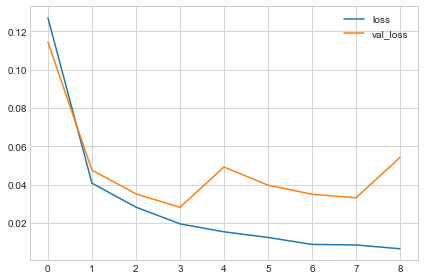

In [4]:
early_stopping = EarlyStopping(
    min_delta=0.00001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(
    trainX, trainy,
    validation_data=(testX, testy),
    batch_size=120,
    epochs=10,
    callbacks=[early_stopping],
)
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

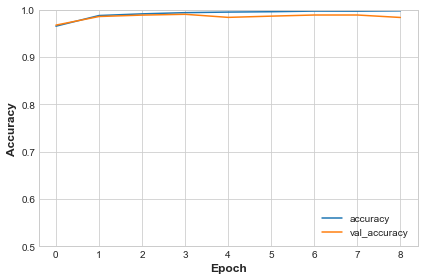

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

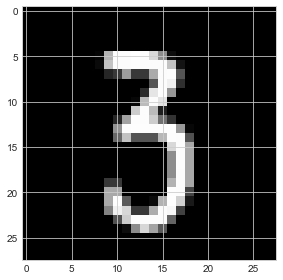

3


In [6]:
toTest = trainX[5432]
plt.imshow(toTest, cmap='gray')
plt.show()
print(np.argmax(model.predict(np.expand_dims(toTest,axis=0)), axis=1)[0])